In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import pearsonr
from matplotlib.pyplot import MultipleLocator

In [3]:
f = h5py.File(r'F:\Code\coupling\matlab\file\sub\output\SDI_sub.mat') 
SDI = f['SDI_list'][:]

# yeo_tran = pd.read_csv('/home/syb/Code/coupling/matlab/file/raw/yeo/subregion_func_network_Yeo.csv')


# label = np.loadtxt('/home/syb/Code/coupling/python/file/data/SDI_sub/sc_mode_label.csv')

In [5]:

SDI_m = SDI.mean(1)
rp = pearsonr(SDI_m[:, 1], SDI_m[:, 0])
print("r= " + str(rp[0]) + ", p = " + str(rp[1]))
rp = pearsonr(SDI_m[:, 2], SDI_m[:, 0])
print("r= " + str(rp[0]) + ", p = " + str(rp[1]))
rp = pearsonr(SDI_m[:, 1], SDI_m[:, 2])
print("r= " + str(rp[0]) + ", p = " + str(rp[1]))

r= 0.9815936027975488, p = 1.8957198697262825e-177
r= 0.9361566586630199, p = 9.269311931518991e-113
r= 0.9250937868708937, p = 1.3665484233176123e-104


(0.0, 3.8)

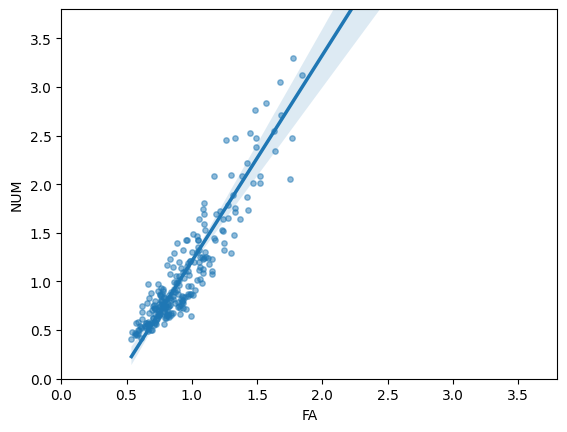

In [4]:
SDI_m = SDI.mean(1)

rp = pearsonr(SDI_m[:,1],SDI_m[:,2])

df_m = pd.DataFrame(SDI_m, columns=['FA','MD','NUM'])

sns.regplot(data= df_m, x='FA',y= 'NUM',
                line_kws={'linewidth':2.5}, 
                #color="black",
                scatter_kws = {'s':15, 'alpha' : 0.5})
plt.xlim([0, 3.8])
plt.ylim([0, 3.8])

r= 0.981593602797549, p = 1.8957198697234808e-177


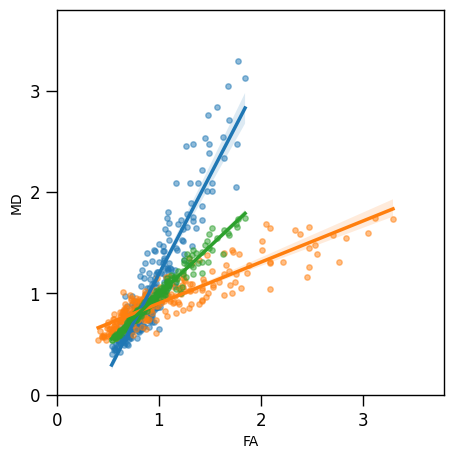

In [4]:
SDI_m = SDI.mean(1)

a = np.where(SDI_m[:, 2] > 7)

rp = pearsonr(SDI_m[:, 1], SDI_m[:, 0])
print("r= " + str(rp[0]) + ", p = " + str(rp[1]))
SDI_m = np.delete(SDI_m, 232, axis=0)


df_m = pd.DataFrame(SDI_m, columns=["FA", "MD", "NUM"])
fig, ax = plt.subplots(figsize=(5, 5))

sns.regplot(
    data=df_m,
    x="FA",
    y="NUM",
    line_kws={"linewidth": 2.5},
    # color="black",
    scatter_kws={"s": 15, "alpha": 0.5},
)

sns.regplot(
    data=df_m,
    x="NUM",
    y="MD",
    line_kws={"linewidth": 2.5},
    # color="black",
    scatter_kws={"s": 15, "alpha": 0.5},
)

sns.regplot(
    data=df_m,
    x="FA",
    y="MD",
    # scatter=False,
    line_kws={"linewidth": 2.5},
    # color="black",
    scatter_kws={"s": 15, "alpha": 0.5},
    label="- FA-MD ,r = 0.98",
)


plt.xlim([0, 3.8])
plt.ylim([0, 3.8])


x_major_locator = MultipleLocator(1)
# 把x轴的刻度间隔设置为1，并存在变量里
y_major_locator = MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
# 把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)

# plt.title(modelName+', r= '+ str(rp[0]) +', p = '+ str(rp[1]))

plt.tick_params(labelsize=12, pad=4, length=8, width=1)
ax.spines["top"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)
ax.spines["left"].set_linewidth(1)
ax.spines["right"].set_linewidth(1)
